In [19]:
def plot_figures_lr(lrs):
    plt.figure(figsize=(15,5))
    for lr in lrs:
        directory = get_directory(lr, dataset_name, opt_name, model_name, weight_decay, batch_size, epochs)

        with open(f'../{directory}train_graphs.pk', 'rb') as f:
            train_graphs = pickle.load(f)


        cur_epochs = train_graphs.log_epochs
        plt.subplot(2,5,1)
        plt.semilogy(cur_epochs, train_graphs.loss)
        #plt.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Training Loss')


        plt.subplot(2,5,2)
        plt.semilogy(cur_epochs, train_graphs.eigs)
        #plt.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Sharpness')

        plt.subplot(2,5,3)
        plt.semilogy(cur_epochs, train_graphs.test_loss)
        #.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Testing Loss')

        plt.subplot(2,5,4)
        plt.semilogy(cur_epochs, train_graphs.test_accuracy)
        #.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Testing Accuracy')

        plt.subplot(2,5,5)
        plt.plot(cur_epochs, train_graphs.eigs_test)
        #.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Testing Sharpness')

    plt.legend(lrs)
    plt.tight_layout()
    plt.show()

def plot_figures_batch_sizes(batch_sizes):
    plt.figure(figsize=(15,5))
    for batch_size in batch_sizes:
        directory = get_directory(lr, dataset_name, opt_name, model_name, momentum, weight_decay, batch_size, epochs)

        with open(f'../{directory}train_graphs.pk', 'rb') as f:
            train_graphs = pickle.load(f)


        cur_epochs = train_graphs.log_epochs
        plt.subplot(2,5,1)
        plt.semilogy(cur_epochs, train_graphs.loss)
        #plt.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Training Loss')


        plt.subplot(2,5,2)
        #plt.semilogy(cur_epochs, train_graphs.eigs)
        plt.plot(cur_epochs, train_graphs.eigs)
        #plt.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Sharpness')

        plt.subplot(2,5,3)
        plt.semilogy(cur_epochs, train_graphs.test_loss)
        #.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Testing Loss')

        plt.subplot(2,5,4)
        plt.semilogy(cur_epochs, train_graphs.test_accuracy)
        #.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Testing Accuracy')

        plt.subplot(2,5,5)
        plt.semilogy(cur_epochs, train_graphs.eigs_test)
        #.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Testing Sharpness')

    plt.legend(batch_sizes)
    plt.tight_layout()
    plt.show()

In [7]:
import sys
sys.path.append('..')
from main import graphs
import torch
import pickle
import matplotlib.pyplot as plt
import numpy as np

loss_name = 'MSELoss'

def get_lookup_directory(lr, dataset_name, opt_name, model_name, momentum, weight_decay, batch_size, **kwargs):
    results_dir = "results"
    directory = f"{results_dir}/{dataset_name}/{opt_name}/{model_name}/"
    for key, value in kwargs.items():
        directory += f"{key}_{value}/"
    directory += f"lr_{lr}/moment_{momentum}/wd_{weight_decay}/batch_size_{batch_size}/"
    return directory

def get_directory(lr, dataset_name, opt_name, model_name, momentum, weight_decay, batch_size, epochs, **kwargs):
    #results_dir = "results"
    #directory = f"{results_dir}/{model_name}/{dataset_name}/{opt_name}/lr_{lr}/wd_{weight_decay}/batch_size_{batch_size}/epoch_{epochs}/"
    directory = get_lookup_directory(lr, dataset_name, opt_name, model_name, momentum, weight_decay, batch_size, **kwargs) + f"epoch_{epochs}/run_0/"
    print(directory)
    return directory

In [ ]:
! python main.py --dataset cifar --model resnet18 --loss MSELoss --opt sgd --lr 0.001 --epoch 4000 --analysis loss eigs --batch_size 512

results/cifar/sgd/resnet18/lr_0.001/wd_0/batch_size_512/epoch_2000/
results/cifar/sgd/resnet18/lr_0.002/wd_0/batch_size_512/epoch_2000/
results/cifar/sgd/resnet18/lr_0.004/wd_0/batch_size_512/epoch_2000/


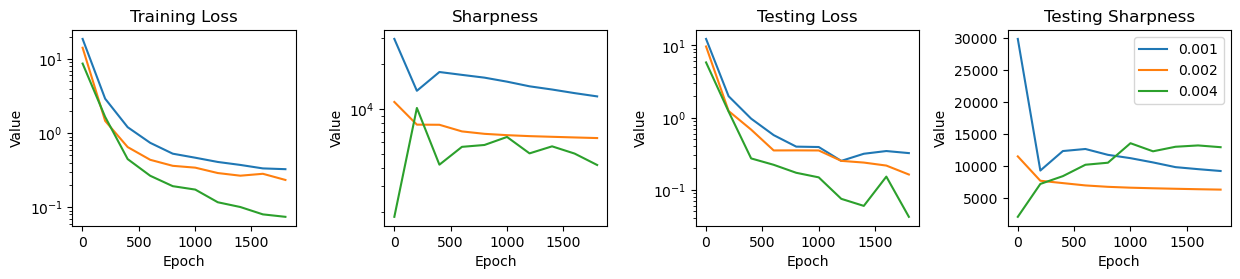

In [44]:
dataset_name, opt_name, weight_decay, batch_size, epochs = "cifar", "sgd", 0, 512, 2000
model_name = "resnet18"
model_params = {}

plot_figures_lr([0.001, 0.002, 0.004])

results/cifar/sgd/resnet18/lr_0.001/moment_0/wd_0/batch_size_128/epoch_2000/run_0/
results/cifar/sgd/resnet18/lr_0.001/moment_0/wd_0/batch_size_256/epoch_2000/run_0/
results/cifar/sgd/resnet18/lr_0.001/moment_0/wd_0/batch_size_512/epoch_2000/run_0/
results/cifar/sgd/resnet18/lr_0.001/moment_0/wd_0/batch_size_1024/epoch_2000/run_0/


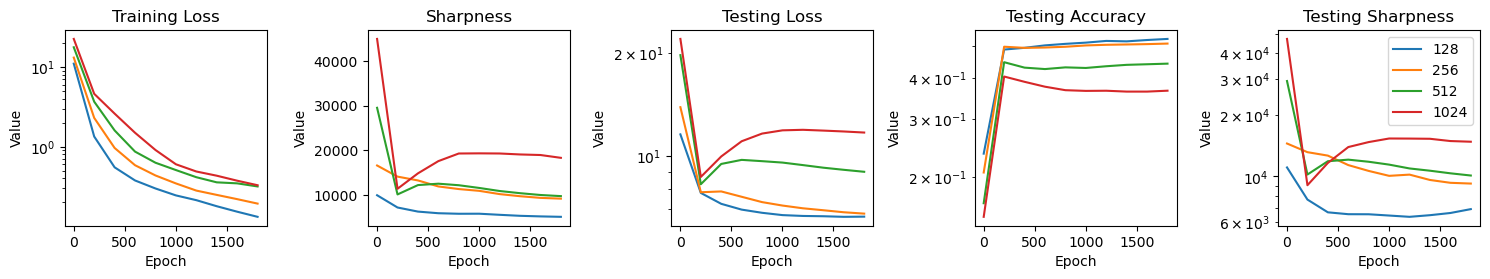

In [36]:
dataset_name, opt_name, momentum, weight_decay, batch_size, lr, epochs = "cifar", "sgd", 0, 0, 512, 0.001, 2000
model_name = "resnet18"
model_params = {}

#plot_figures_batch_sizes([512, 1024])
plot_figures_batch_sizes([128, 256, 512, 1024])

results/cifar/sgd/resnet18/lr_0.01/moment_0.9/wd_0.0005/batch_size_128/epoch_2000/run_0/


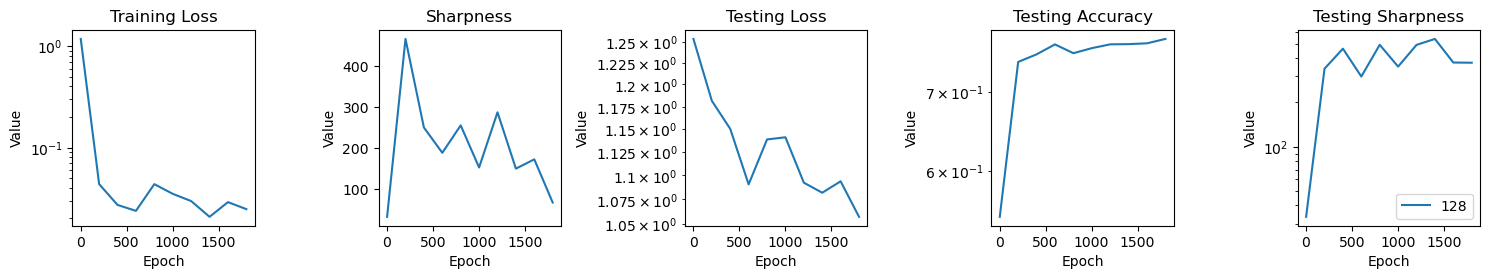

In [37]:
loss_name = 'CrossEntropyLoss'
lr, dataset_name, opt_name, momentum, weight_decay, batch_size, epochs = 0.01, "cifar", "sgd", 0.9, 5e-4, 128, 2000
model_name = "resnet18"

plot_figures_batch_sizes([128])